# Libraries import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
import rdkit
from rdkit.Chem import QED
import warnings
warnings.filterwarnings('ignore')
from chembl_structure_pipeline import standardize_mol, get_parent_mol

# Data loading

In [2]:
initial_smi = pd.read_excel(r'../model/data/RORgamma_active_compounds.xlsx')
initial_smi = list(initial_smi['SMILES_canonical'])
initial_smi = pd.DataFrame(initial_smi)
print("Initial data description: ")
print(initial_smi.describe())
initial_smi_ = list(initial_smi[0])
corrected_initial_list = [str(smi).split(' ')[0] for smi in initial_smi_]
initial_smi['SMILES_clean'] = corrected_initial_list
all_kiniase = initial_smi['SMILES_clean']
#initial_smi['SMILES_length'] = [len(initial_smi['SMILES_clean'][smi]) for smi in range(len(initial_smi['SMILES_clean']))]
#initial_smi = initial_smi.loc[initial_smi['SMILES_length'] <= 52]
#print("SMILES used to predict new molecules description: ")
print(all_kiniase.describe())
#initial_smi = initial_smi['SMILES_clean']
print("Examples of initial structures: ")
print(all_kiniase[0:3])

Initial data description: 
                                                        0
count                                                  36
unique                                                 35
top     O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...
freq                                                    2
count                                                    36
unique                                                   35
top       O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...
freq                                                      2
Name: SMILES_clean, dtype: object
Examples of initial structures: 
0    CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C
1    CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
2    CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
Name: SMILES_clean, dtype: object


In [3]:
smiles = all_kiniase
smiles.head()

0     CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C
1     CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
2     CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
3    CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...
4    CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...
Name: SMILES_clean, dtype: object

In [4]:
new_set0 = smiles.to_list()

In [5]:
dff_15 = pd.DataFrame(new_set0,columns=['SMILES'])
dff_15.shape

(36, 1)

# Duplicates deletion

In [6]:
dff_17 = dff_15.drop_duplicates()
dff_17.shape

(35, 1)

In [7]:
dff_17 = dff_17.reset_index()

In [8]:
new_set1 = dff_17['SMILES'].to_list()
new_set1[0]

'CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C'

In [9]:
new_set1 = [Chem.MolToSmiles(get_parent_mol(Chem.MolFromSmiles(smiles), neutralize=True, check_exclusion=True, verbose=False)[0]) for smiles in new_set1]

In [10]:
new_set1[5]

'O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F)F)C(F)(F)F)cc1'

# Seeing of the first structure

In [11]:
structure =  Chem.MolFromSmiles(new_set1[2])

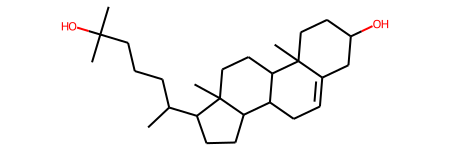

In [12]:
structure

# Calculation of the QED descriptors

In [13]:
QED_list = []
for smiles in new_set1:
    QED_list.append(QED.properties(Chem.MolFromSmiles(smiles)))

In [14]:
QED_list[0]

QEDproperties(MW=402.66300000000024, ALOGP=6.5036000000000085, HBA=2, HBD=2, PSA=40.46, ROTB=5, AROM=0, ALERTS=1)

# Preparation of the generated QED descriptors to the dataframe

In [15]:
df = pd.DataFrame.from_records(QED_list, columns = ['Molecular weight', 'alogP', 'HBacceptors','HBdonors',
                                                    'Polar surface area','rotatable bonds','aromatics rings','alerts'])

In [16]:
df.head()

,Molecular weight,alogP,HBacceptors,HBdonors,Polar surface area,rotatable bonds,aromatics rings,alerts
0,402.663,6.5036,2,2,40.46,5,0,1
1,402.663,6.3595,2,2,40.46,5,0,1
2,402.663,6.5036,2,2,40.46,5,0,1
3,456.711,7.0895,3,2,57.53,1,0,1
4,780.949,2.2181,14,6,203.06,7,0,2


# the histogram of the molecular weight distribution

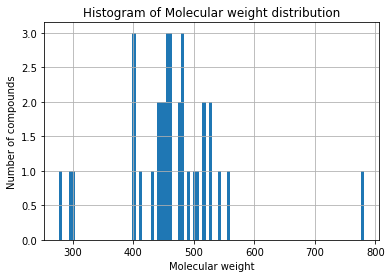

count     35.000000
mean     463.706314
std       84.116508
min      278.311000
25%      442.568500
50%      460.418000
75%      494.781500
max      780.949000
Name: Molecular weight, dtype: float64
Kurtosis:
5.8529
Skewness:
0.9404


In [17]:
plt.hist(df['Molecular weight'],bins=100)
plt.xlabel('Molecular weight')
plt.ylabel('Number of compounds')
plt.title('Histogram of Molecular weight distribution')
plt.grid(True)
plt.show()

print(df['Molecular weight'].describe())
print('Kurtosis:')
print(round(df['Molecular weight'].kurtosis(),4))
print('Skewness:')
print(round(df['Molecular weight'].skew(),4))

# the histogram of the octanol-water partition coefficient distribution

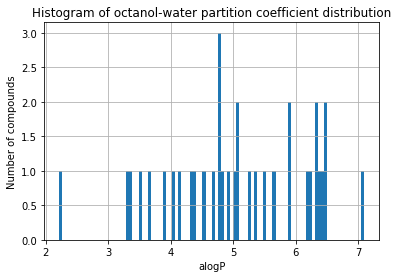

count    35.000000
mean      5.052918
std       1.125950
min       2.218100
25%       4.363950
50%       5.012000
75%       6.032300
max       7.089500
Name: alogP, dtype: float64
Kurtosis:
-0.2713
Skewness:
-0.3348


In [18]:
plt.hist(df['alogP'],bins=100)
plt.xlabel('alogP')
plt.ylabel('Number of compounds')
plt.title('Histogram of octanol-water partition coefficient distribution')
plt.grid(True)
plt.show()

print(df['alogP'].describe())
print('Kurtosis:')
print(round(df['alogP'].kurtosis(),4))
print('Skewness:')
print(round(df['alogP'].skew(),4))

# the histogram of the hydrogen bonding acceptors number distribution

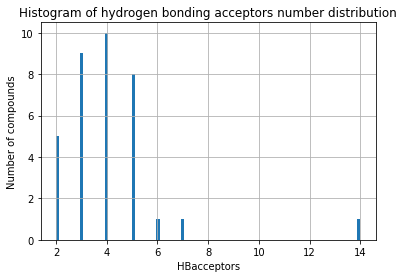

count    35.000000
mean      4.114286
std       2.097217
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      14.000000
Name: HBacceptors, dtype: float64
Kurtosis:
14.4055
Skewness:
3.1879


In [19]:
plt.hist(df['HBacceptors'],bins=100)
plt.xlabel('HBacceptors')
plt.ylabel('Number of compounds')
plt.title('Histogram of hydrogen bonding acceptors number distribution')
plt.grid(True)
plt.show()

print(df['HBacceptors'].describe())
print('Kurtosis:')
print(round(df['HBacceptors'].kurtosis(),4))
print('Skewness:')
print(round(df['HBacceptors'].skew(),4))

# the histogram of the hydrogen bonding donors number distribution

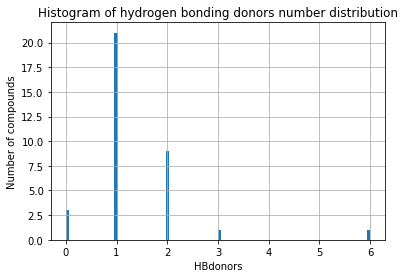

count    35.000000
mean      1.371429
std       1.031439
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       6.000000
Name: HBdonors, dtype: float64
Kurtosis:
11.5503
Skewness:
2.7547


In [20]:
plt.hist(df['HBdonors'],bins=100)
plt.xlabel('HBdonors')
plt.ylabel('Number of compounds')
plt.title('Histogram of hydrogen bonding donors number distribution')
plt.grid(True)
plt.show()

print(df['HBdonors'].describe())
print('Kurtosis:')
print(round(df['HBdonors'].kurtosis(),4))
print('Skewness:')
print(round(df['HBdonors'].skew(),4))

# the histogram of the polar surface area distribution

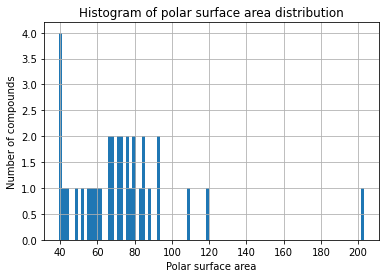

count     35.000000
mean      72.702857
std       29.763467
min       39.600000
25%       56.330000
50%       71.520000
75%       81.930000
max      203.060000
Name: Polar surface area, dtype: float64
Kurtosis:
10.2196
Skewness:
2.5492


In [21]:
plt.hist(df['Polar surface area'],bins=100)
plt.xlabel('Polar surface area')
plt.ylabel('Number of compounds')
plt.title('Histogram of polar surface area distribution')
plt.grid(True)
plt.show()

print(df['Polar surface area'].describe())
print('Kurtosis:')
print(round(df['Polar surface area'].kurtosis(),4))
print('Skewness:')
print(round(df['Polar surface area'].skew(),4))

# the histogram of the rotatable bonds number distribution

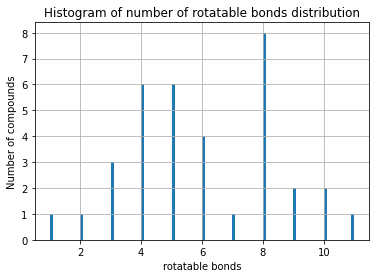

count    35.000000
mean      6.000000
std       2.461468
min       1.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      11.000000
Name: rotatable bonds, dtype: float64
Kurtosis:
-0.7469
Skewness:
0.1004


In [22]:
plt.hist(df['rotatable bonds'],bins=100)
plt.xlabel('rotatable bonds')
plt.ylabel('Number of compounds')
plt.title('Histogram of number of rotatable bonds distribution')
plt.grid(True)
plt.show()

print(df['rotatable bonds'].describe())
print('Kurtosis:')
print(round(df['rotatable bonds'].kurtosis(),4))
print('Skewness:')
print(round(df['rotatable bonds'].skew(),4))

# the histogram of the aromatics rings number distribution

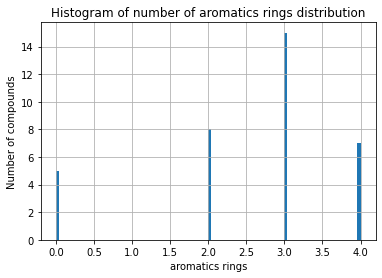

count    35.000000
mean      2.542857
std       1.244821
min       0.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: aromatics rings, dtype: float64
Kurtosis:
0.2522
Skewness:
-0.9768


In [23]:
plt.hist(df['aromatics rings'],bins=100)
plt.xlabel('aromatics rings')
plt.ylabel('Number of compounds')
plt.title('Histogram of number of aromatics rings distribution')
plt.grid(True)
plt.show()

print(df['aromatics rings'].describe())
print('Kurtosis:')
print(round(df['aromatics rings'].kurtosis(),4))
print('Skewness:')
print(round(df['aromatics rings'].skew(),4))

# QED descriptor

Drug-Like (QED):

    - mass < 400
    
    - ring count > 0
    
    - rotatable bond count < 5
    
    - h-bond donor count <= 5
    
    - h-bond acceptor count <= 10
    
    - logP < 5
    
QED is calculated from weighted sum of ADS of mapped properties:
WEIGHT_MEAN = QEDproperties( MW = 0.66, ALOGP = 0.46, HBA = 0.05, HBD = 0.61, PSA = 0.06, ROTB = 0.65, AROM = 0.48, ALERTS = 0.95 )

https://github.com/kevinid/molecule_generator/blob/master/rdkit_contrib/qed.py
Function is described here...


In [24]:
QED_list_QED = []
for smiles in new_set1:
    QED_list_QED.append(QED.qed(Chem.MolFromSmiles(smiles)))

In [25]:
QED_list_QED[0]

0.5150085052552582

In [26]:
df_QED = pd.DataFrame(QED_list_QED, columns = ['Quantitative Estimation of Drug-likeness'])

In [27]:
df_QED.head()

,Quantitative Estimation of Drug-likeness
0,0.515009
1,0.525292
2,0.515009
3,0.414109
4,0.162215


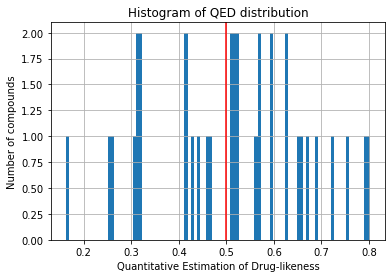

count    35.000000
mean      0.510450
std       0.162249
min       0.162215
25%       0.416163
50%       0.515009
75%       0.627598
max       0.802573
Name: Quantitative Estimation of Drug-likeness, dtype: float64
Kurtosis:
-0.614
Skewness:
-0.1697


In [28]:
plt.hist(df_QED['Quantitative Estimation of Drug-likeness'],bins=100)
plt.xlabel('Quantitative Estimation of Drug-likeness')
plt.ylabel('Number of compounds')
plt.title('Histogram of QED distribution')
plt.axvline(x=0.5, color='r')
plt.grid(True)
plt.show()

print(df_QED['Quantitative Estimation of Drug-likeness'].describe())
print('Kurtosis:')
print(round(df_QED['Quantitative Estimation of Drug-likeness'].kurtosis(),4))
print('Skewness:')
print(round(df_QED['Quantitative Estimation of Drug-likeness'].skew(),4))

# Combination of SMILES with QED value

In [29]:
dff_17['QED'] = QED_list_QED

In [30]:
dff_17.head()

,index,SMILES,QED
0,0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,0.515009
1,1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0.525292
2,2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0.515009
3,3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,0.414109
4,4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,0.162215


In [31]:
df_QED_above_0_6 = dff_17.loc[dff_17['QED'] > 0.5] #0.6

In [32]:
len(df_QED_above_0_6['QED'])

21

# Lipinski's rule of 5

Lipinski:

    - Moleculer Weight <= 500
    
    - LogP <= 5
    
    - H-Bond Donor Count <= 5
    
    - H-Bond Acceptor Count <= 10
    
    - Rotatable bonds <= 5

In [33]:
dff_17['molecular_weight'] = [Descriptors.ExactMolWt(Chem.MolFromSmiles(molecule)) for molecule in dff_17['SMILES']]
dff_17['logp'] = [Descriptors.MolLogP(Chem.MolFromSmiles(molecule)) for molecule in dff_17['SMILES']]
dff_17['h_bond_donors'] = [Descriptors.NumHDonors(Chem.MolFromSmiles(molecule)) for molecule in dff_17['SMILES']]
dff_17['h_bond_acceptors'] = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(molecule)) for molecule in dff_17['SMILES']]
dff_17['rotatable_bonds'] = [Descriptors.NumRotatableBonds(Chem.MolFromSmiles(molecule)) for molecule in dff_17['SMILES']]

In [34]:
dff_17.head()

,index,SMILES,QED,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds
0,0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,0.515009,402.349781,6.5036,2,2,5
1,1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0.525292,402.349781,6.3595,2,2,5
2,2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0.515009,402.349781,6.5036,2,2,5
3,3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,0.414109,456.360345,7.0895,2,2,1
4,4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,0.162215,780.429607,2.2181,6,14,7


In [35]:
# Lipinski
dff_17['Lipinski Rule of 5'] = 0
for element in range(len(dff_17)):
    
    if dff_17['molecular_weight'][element] <= 500 and dff_17['logp'][element] <= 5 and dff_17['h_bond_donors'][element] <= 5 and dff_17['h_bond_acceptors'][element] <= 10 and dff_17['rotatable_bonds'][element] <= 5:
        lipinski = True
        dff_17["Lipinski Rule of 5"][element] = 1
    else:
        dff_17["Lipinski Rule of 5"][element] = 0

In [36]:
dff_17.head()

,index,SMILES,QED,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Lipinski Rule of 5
0,0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,0.515009,402.349781,6.5036,2,2,5,0
1,1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0.525292,402.349781,6.3595,2,2,5,0
2,2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0.515009,402.349781,6.5036,2,2,5,0
3,3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,0.414109,456.360345,7.0895,2,2,1,0
4,4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,0.162215,780.429607,2.2181,6,14,7,0


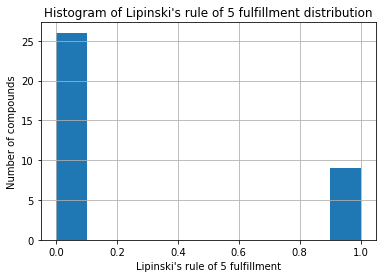

count    35.000000
mean      0.257143
std       0.443440
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       1.000000
Name: Lipinski Rule of 5, dtype: float64
Kurtosis:
-0.6935
Skewness:
1.1617


In [37]:
plt.hist(dff_17['Lipinski Rule of 5'],bins=10)
plt.xlabel("Lipinski's rule of 5 fulfillment")
plt.ylabel('Number of compounds')
plt.title("Histogram of Lipinski's rule of 5 fulfillment distribution")
plt.grid(True)
plt.show()

print(dff_17['Lipinski Rule of 5'].describe())
print('Kurtosis:')
print(round(dff_17['Lipinski Rule of 5'].kurtosis(),4))
print('Skewness:')
print(round(dff_17['Lipinski Rule of 5'].skew(),4))

In [38]:
to_excel = dff_17[(dff_17['QED'] > 0.5) & (dff_17['Lipinski Rule of 5'] == 1)] #0.6
QED_list_0 = [QED.properties(Chem.MolFromSmiles(smiles)) for smiles in to_excel['SMILES']]
df = pd.DataFrame.from_records(QED_list_0, columns = ['Molecular weight', 'alogP', 'HBacceptors','HBdonors',
                                                    'Polar surface area','rotatable bonds','aromatics rings','alerts'])
to_excel = to_excel.reset_index()
to_excel['Polar surface area'] = df['Polar surface area']
to_excel['aromatics rings'] = df['aromatics rings']
to_excel['Lipinski alerts - to QED calc'] = df['alerts']

In [39]:
column_order = ['SMILES', 'molecular_weight', 'logp', 'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'Polar surface area', 'aromatics rings', 'Lipinski alerts - to QED calc', 'Lipinski Rule of 5', 'QED']

In [40]:
to_excel = to_excel[column_order]

In [41]:
to_excel.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979


In [42]:
to_excel

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979
5,O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...,482.065648,4.77500,2,5,3,92.42,3,1,1,0.524369
6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067
7,Cc1cc(C)c2nc(C(=O)Nc3sccc3C)sc2c1,302.054755,4.53536,1,4,2,41.99,3,0,1,0.755082
8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573


In [43]:
print("Percentage of molecules that fulfilled restrictions: "+str((round(len(to_excel)*100/len(dff_17),2)))+'%.')

Percentage of molecules that fulfilled restrictions: 25.71%.


In [44]:
to_excel.to_excel('ROR_gamma_active_QED_Lipinski.xlsx')